In [1]:
#data source: https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data

#load the data. 
import pandas as pd

df = pd.read_csv('Crime_Data_from_2020_to_Present_20241218.csv')

#what are the names of the columns. 
col_names = df.columns

pd.set_option('display.max_columns', None)

In [11]:
"""
AREA NAME
Central        69305
77th Street    61804
Pacific        57823
Southwest      57226
Hollywood      52286
Southeast      50249
N Hollywood    50144
Olympic        48691
Wilshire       48138
Rampart        46712
West LA        45480
Van Nuys       42824
Northeast      42768
Newton         42358
West Valley    42021
Harbor         41262
Devonshire     41053
Topanga        40726
Mission        40456
Hollenbeck     36940
Foothill       33094
"""
result = df["AREA NAME"].value_counts(normalize = True)



In [100]:
#print out the cities that reported crime. 
cities = df['AREA NAME'].unique()
print(cities)


['Wilshire' 'Central' 'Southwest' 'Van Nuys' 'Hollenbeck' 'Rampart'
 'Newton' 'Northeast' '77th Street' 'Hollywood' 'Harbor' 'West Valley'
 'West LA' 'N Hollywood' 'Pacific' 'Devonshire' 'Mission' 'Southeast'
 'Olympic' 'Foothill' 'Topanga']


In [93]:
#Checking for missing values.

#checking if columns have NaN values
col_with_nan = []  #stores the columns with with Nan
for col in range(len(df.columns)): #loop through the columns
    if(df.iloc[:, col].isna().any() == True): #if any of the columns has a value of Nan
        #print(f"Nan found in column: {col}")  #print out the column number 
        col_with_nan.append(df.columns[col])  #and store the column
print("done")

done


In [94]:
#prints out the columns with missing values. 
#they seem reasonable. 
col_with_nan


['Mocodes',
 'Vict Sex',
 'Vict Descent',
 'Premis Cd',
 'Premis Desc',
 'Weapon Used Cd',
 'Weapon Desc',
 'Status',
 'Crm Cd 1',
 'Crm Cd 2',
 'Crm Cd 3',
 'Crm Cd 4',
 'Cross Street']

In [ ]:
#Todo: do a bit of reading about how crimes are reported in this database. Would it make sense that these fields have missing values? 

#Modcodes: A crime can be committed without apprent motive. so any crime comitted can have a NaN value. Although they do provide more detail about the crime.
#Vict Sex: permissible NaN because the aim is to analyze the crime not the sex of the victim.
#Premis Cd: Premis Cd is what type of structure the crime was committed. Im not analyzing this yet. Ill allow this to be NaN
#Premis Desc: there is suppose to be a list of codes that describe the premises but I cant find it. 
#Weapon Used Cd: is the code assigned to weapons. 
#Weapon Desc: is the description of the weapon. 
#Status: is the current status of the incident crime. 
#Crm Cd 1: the prinicpl crime code. Some dont have any and the other three Crm Cd 2-4 are populated. 
#Cross Street: Each crime is given a LOCATION column, and the Cross Street Column gives a granular perspective to the crime's location. 

In [12]:
#see the rows with nan, see if they make sense. 
cols_to_check = ["Crm Cd 1","Crm Cd 2","Crm Cd 3","Crm Cd 4"]

#find crimes (rows) that have NaN in all four of these columns: Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4
no_Crime_code = df[df[cols_to_check].isna().sum(axis=1) == 4] #there are no rows with such condition. 


In [114]:
#sorting crimes by city
whilshire_crimes = df[df['AREA NAME'] == 'Wilshire']

whilshire_crimes.shape[0] #48138


48138

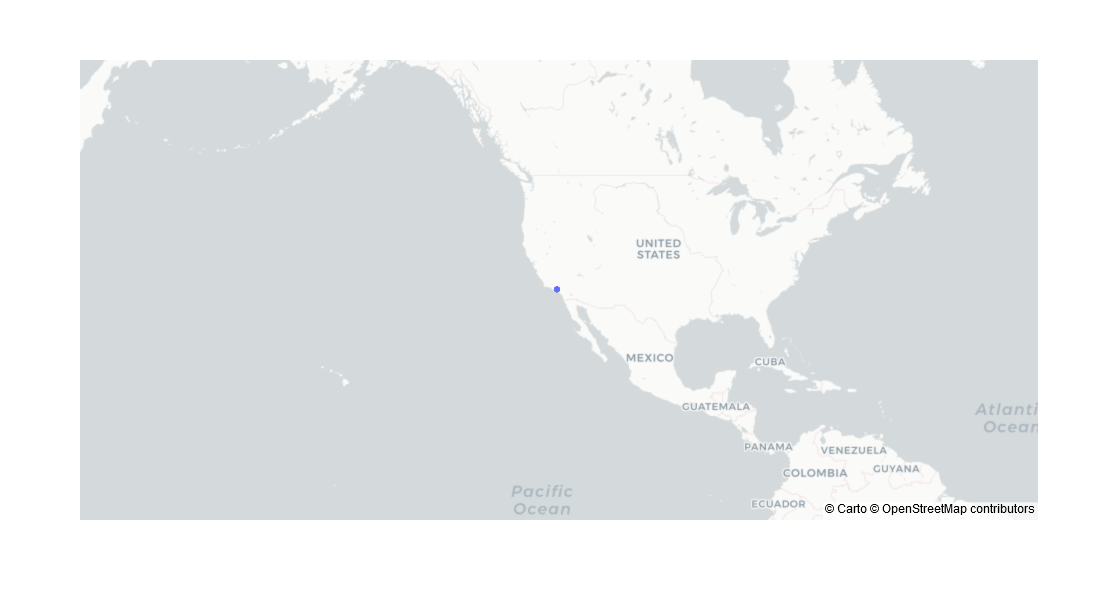

In [127]:
#extract all the lat/Lon values from whilshire column
whilshire_lat = whilshire_crimes["LAT"]
whilshire_lon = whilshire_crimes["LON"]

#making a dictionary to store the coordinates then making a dataframe from it 

whilshire_loc = {'Latitude': whilshire_lat, 'Longitude':  whilshire_lon}
whilshire_loc = pd.DataFrame.from_dict(whilshire_loc)

# Create the map
fig = px.scatter_mapbox(whilshire_loc, lat="Latitude", lon="Longitude",
                        zoom=2, height=600)
fig.update_layout(mapbox_style="carto-positron")
fig.show()
